<br>

---
---
# <center>Applying Classification Tree To Predict Heart Disease</center>

---
---

*In this analysis, I leverage skicit-learn and Cost Complexity Pruning to build a classification tree, which uses continuous and categorical data fom [UCI Machine Learnig](https://archive.ics.uci.edu/ml/index.php) to predict whether or not a patient has heart disease.*

## Introdution

Classification Tree is an algorithm where the target variable is fixed or categorical. The algorithm is then used to identify the `class` within which a target variable would most likely fall. They are used when the dataset needs to be split into classes that belong to the response variable. In many cases, the classes Yes or No. In other words, they are just two and mutually exclusive. In some cases, there may be more than two classes in which case a variant of the classification tree algorithm is used.

Classification Trees are an exceptionally useful machine learning method emplyed when one needs to know how decisions are been made. For example, if one has to justify the prediction to one's superior, they are a good method beause each step in the decision making process is easitly understandable.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To build a classification tree
from sklearn.tree import DecisionTreeClassifier 
# To draw a classification tree
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Importing Data

Now we load in a datser from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Specifically, we are going to be using the [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This dataset allows us to demonstrate the workings of Classification Tree, and then predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [2]:
# URL of dataset
url = (
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
)

# Reading data into memory
df = pd.read_csv(url, header=None)

In [3]:
# Assigning the names from dataset description
columns = {
    0 : 'age',
    1 : 'sex',
    2 : 'cp',
    3 : 'trestbps',
    4 : 'chol',
    5 : 'fbs',
    6 : 'restecg',
    7 : 'thalach',
    8 : 'exang',
    9 : 'oldpeak',
    10 : 'slope',
    11 : 'ca',
    12 : 'thal',
    13 : 'hd'        
}

# Renaming columns for proper understanding
df.rename(columns=columns, inplace=True)

The column names above were gotten from the dataset description from [UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

The description of the 14 attributes are:

| Row Number | Columns Name  | Description  | Values  |
|:---|:---|:---|:---|
| #0 | age |age in years|  |
| #1 | sex |sex | <ul> <li>1 = male</li><li> 0 = female</li></ul>|
| #2 | cp | chest pain type| <ul> <li> Value 1: typical angina</li><li>Value 2: atypical angina</li><li>Value 3: non-anginal pain</li><li>Value 4: asymptomatic</li></ul> |
| #3 | trestbps | resting blood pressure <br>(in mm Hg on admission to the hospital) |  |
| #4 | chol | serum cholestoral in mg/dl | |
| #5 | fbs  | fasting blood sugar > 120 mg/dl | <ul><li>1 = true</li><li> 0 = false</li></ul> |
| #6 | restecg | resting electrocardiographic results | <ul><li>Value 0: normal</li><li>Value 1: having ST-T wave abnormality</li> (T wave inversions and/or ST elevation or depression of > 0.05 mV)<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li></ul>
| #7 | thalach | maximum heart rate achieved | |
| #8 | exang   | exercise induced angina | <ul><li>1 = yes</li><li> 0 = no</li></ul> |
| #9 | oldpeak | ST depression induced by exercise relative to rest | |00
| #10 | slope  |The slope of the peak exercise ST segment | <ul><li>Value 1: upsloping</li><li>Value 2: flat</li><li>Value 3: downsloping</li></ul> |
| #11 | ca | number of major vessels (0-3) colored by flourosopy | |
| #12 | thal | This is short for thalium heart scan |<ul><li> 3 = normal</li> <li>6 = fixed defect</li> <li>7 = reversable defect</li></ul> |
| #13 | hd <br> (the predicted attribute) | diagnosis of heart disease <br> (angiographic disease status) | <ul><li>Value 0: < 50% diameter narrowing</li> <li>Value 1: > 50% diameter narrowing<br>(in any major vessel: attributes 59 through 68 are vessels)</li></ul> |

In [4]:
# print the first 5 rows
print(f"DataFrame has {df.shape} rows and columns respectively")
df.head()

DataFrame has (303, 14) rows and columns respectively


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
 # Checking the datatype of the DataFrame
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [6]:
# Checking for missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

Even though the `isna` function cannot detect any missing values, a futher investigation of the columns with `object` datatype using the `unique` fuction will help to strengthen the conclusion of no missing values

In [7]:
# printing out unique values in the `object` columns
print(f"'{df.columns[-3]}' column has {df[df.columns[-3]].unique()}")
print(f"'{df.columns[-2]}' column has {df[df.columns[-2]].unique()}")

'ca' column has ['0.0' '3.0' '2.0' '1.0' '?']
'thal' column has ['6.0' '3.0' '7.0' '?']


This confirms that both `ca` and 'thal` columns have values incorrectly inputted as `?`

In [8]:
# Identifying rows with question mark
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
# Slicing dataFrame to remove rows with question mark
df_clean = df.loc[(df.ca != '?') & (df.thal != '?')]

In [10]:
df_clean.shape

(297, 14)

In [11]:
# Confirm that the new DataFrame does not have `?` 
print(
    f"'{df_clean.columns[-3]}' column has {df_clean[df_clean.columns[-3]].unique()}"
)
print(
    f"'{df_clean.columns[-2]}' column has {df_clean[df_clean.columns[-2]].unique()}"
)

'ca' column has ['0.0' '3.0' '2.0' '1.0']
'thal' column has ['6.0' '3.0' '7.0']


## Splitting Dataset for Model building
---

In [12]:
# Setting the features columns (dependent variable) 
# on the copy of clean dataframe
X =  df_clean.drop('hd', axis=1).copy()
X.shape

(297, 13)

In [13]:
# Setting the target columns(independent variable) 
# on a copy of the dataframe
y = df_clean['hd'].copy()
y.shape

(297,)

### One Hot Encoding

Here we convert columns that have values in our `feature columns` to categorical datatype so that our `DecisionTreeClassifier` library which we imported from `sklearn.tree` can correctly categorize the `feature columns`.

The columns that must be converted to category datatypes are:
- `'cp'`
- `'restecg'`
- `'slope'`
- `'thal'`

In [14]:
# Defining the columns to be categorized
ColsToBeCoverted = ['cp', 'restecg', 'slope', 'thal']

# Apllying `OneHotEncoding'
X_encoded = pd.get_dummies(X, columns=ColsToBeCoverted, prefix_sep='_')
X_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


### Checking the `'Target Column'`

Before building a `Classification Tree` for the purpose of this submission, the `Target column` need to be checked and converted to just two values; 0s and 1s. **0s** stand for _No Heart Disease_, **1s** (which comprise of original numbers from 1-4) stand for _Various Degrees of Heart Diseases_.

In [15]:
# `y` before coversion
print(f"The unique values of y before conversion are: {y.unique()}")

# converting the values of `y`
y[y > 0] = 1

# `y` after conversion
print(f"The unique values of y after conversion are: {y.unique()}")

The unique values of y before conversion are: [0 2 1 3 4]
The unique values of y after conversion are: [0 1]


## Building A Preliminary Classification Tree
---

In [16]:
# split the data into training and testings sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Creating the Classification decision tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

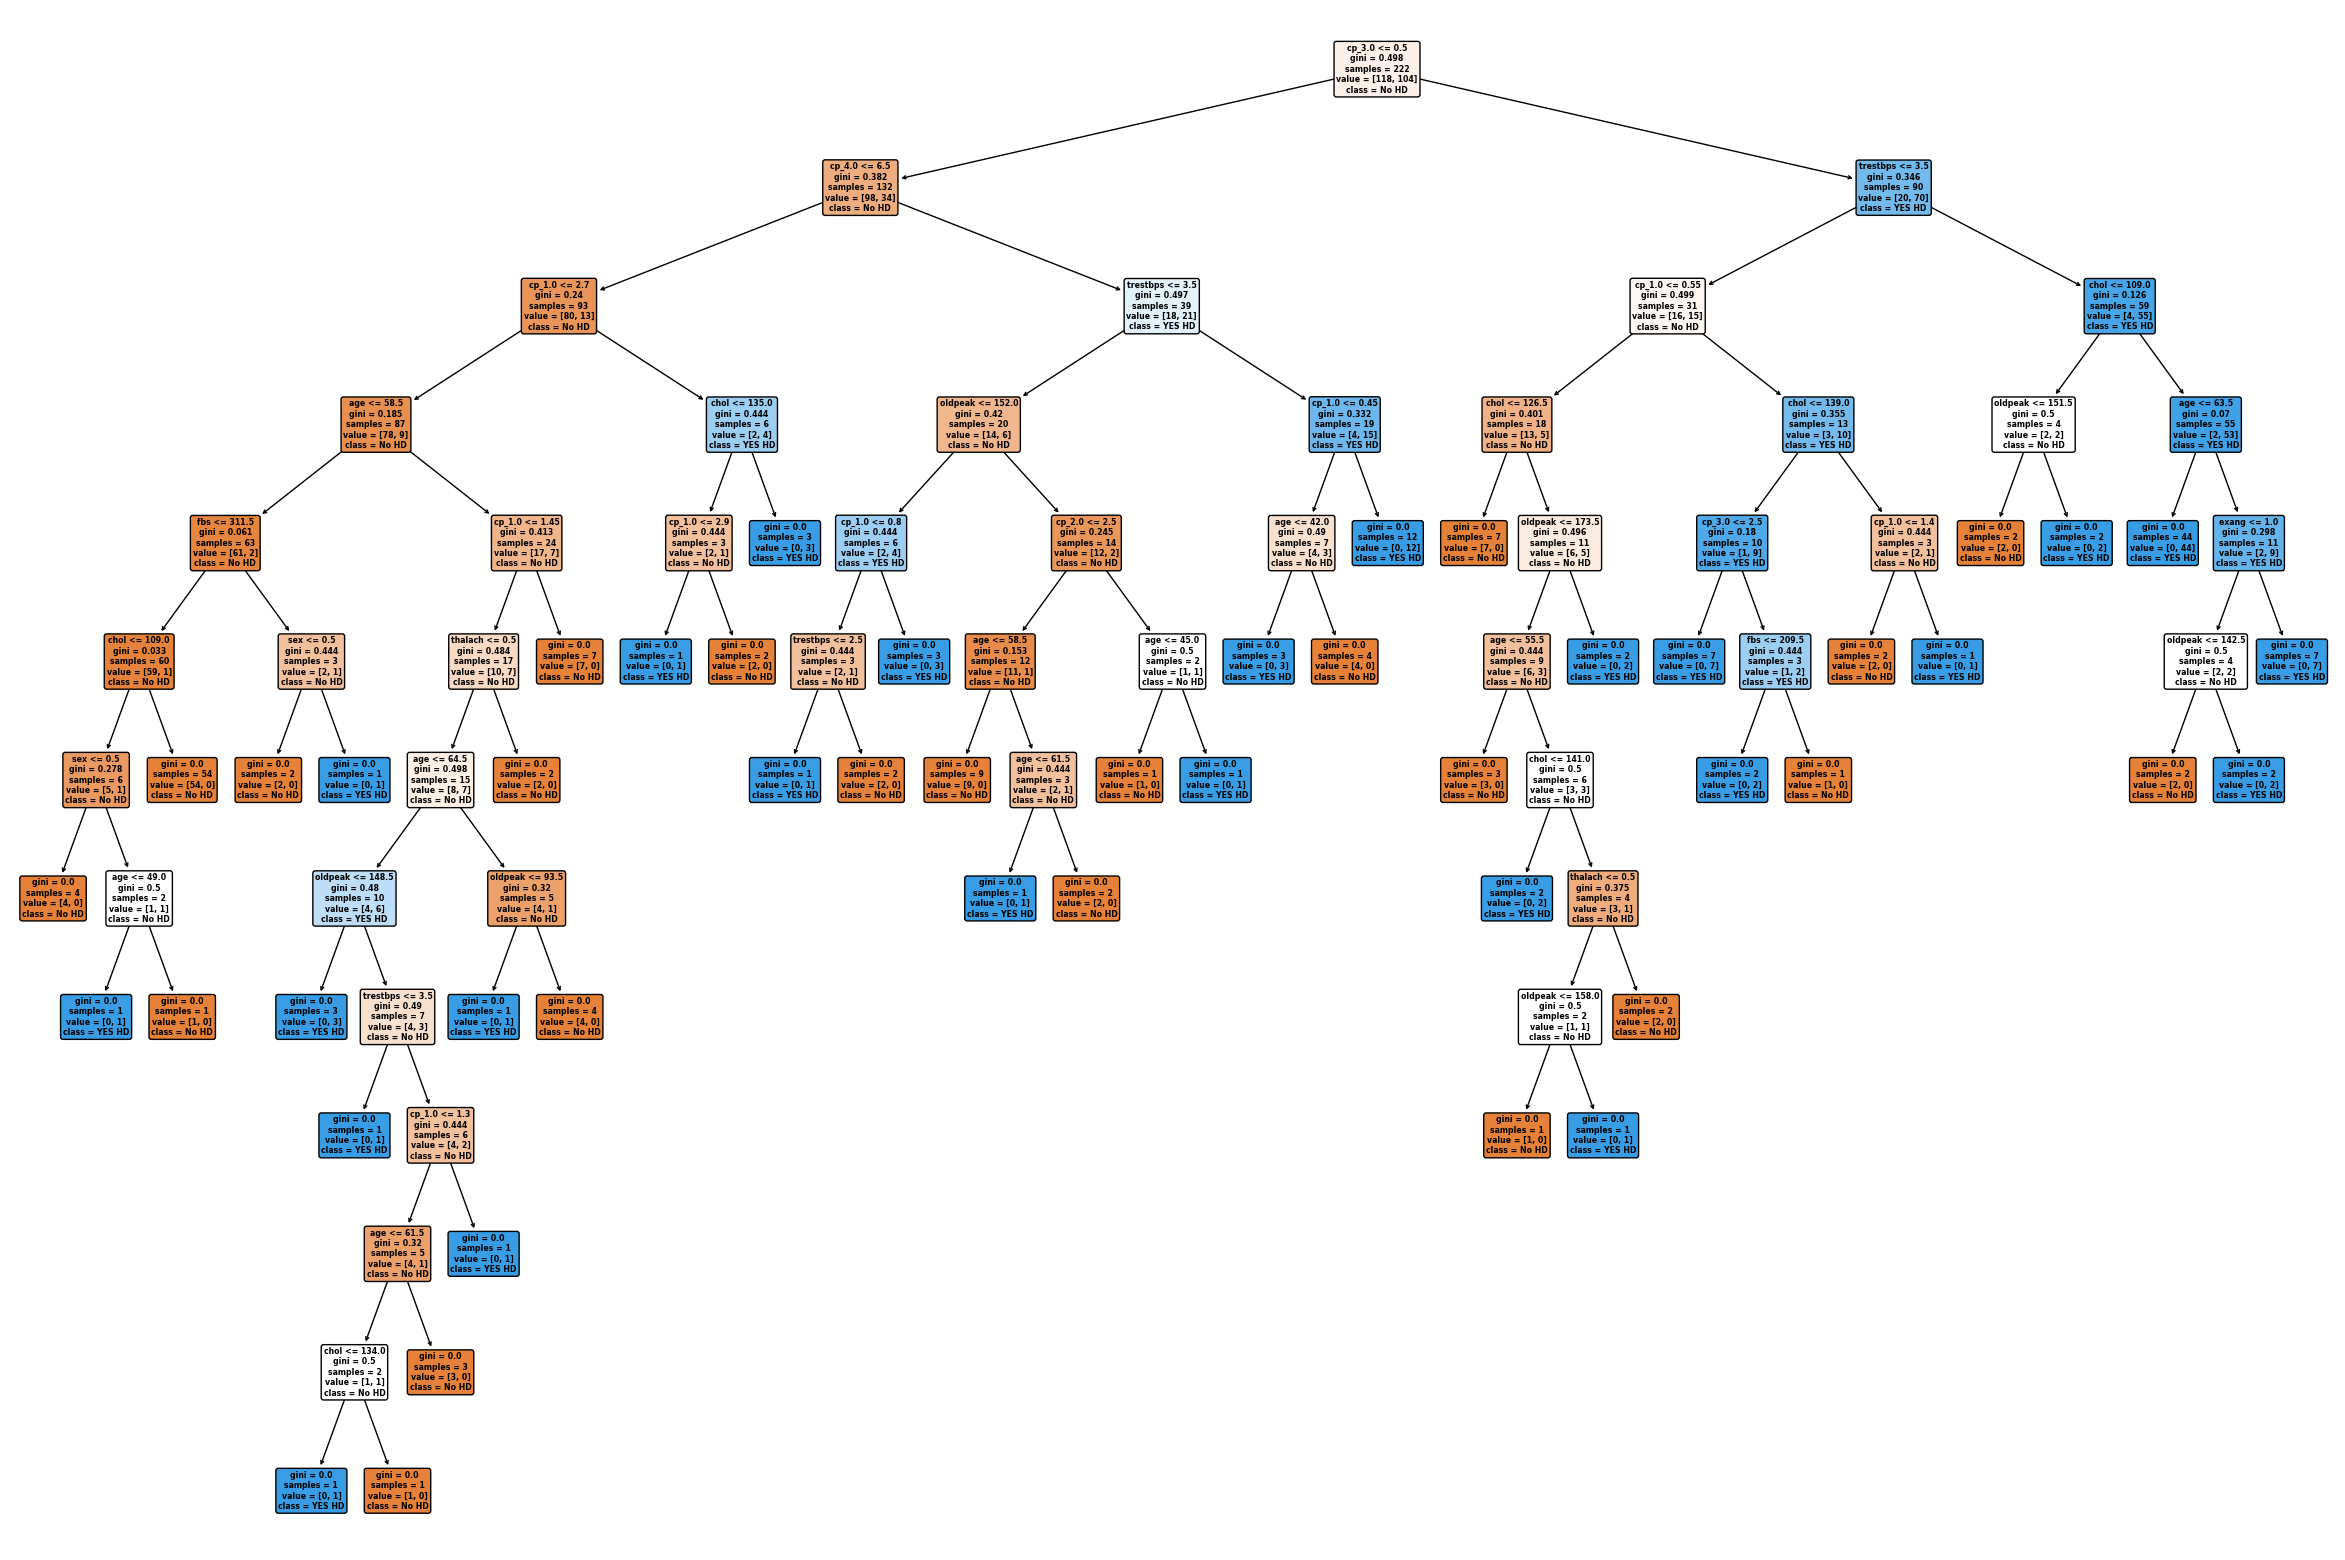

In [17]:
# Plotting the Classification Tree from Training Dataset
fig = plt.figure(figsize=(30, 20))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["No HD", "YES HD"],
         feature_names = X_encoded.columns 
        );

fig.savefig("Classiification_Tree_Training.png")

We have a **Classififcation Tree** for classification, we can now see how our dataset perfoms on our Testing dataset.

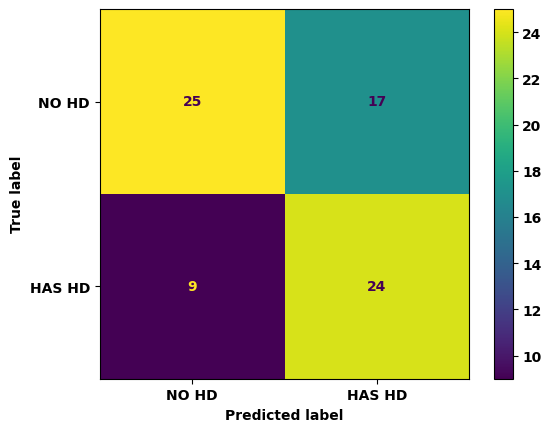

In [18]:
y_pred = clf_dt.predict(X_test)

# plot_confusion_matrix will run the test data and draw the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,
    display_labels = ["NO HD", "HAS HD"]
);

From the Confusion Matrix above, We can make the following deductions from our model :

<br>

<center> True Negative Rate (TNR) $ = \frac {TN}{TN + FP} = \frac {31}{31+11} = 0.7380952380952381 = 74\% $ </center>

<br>
<center> True Positive Rate (TPR) $ = \frac {TP}{TP + FN} = \frac {26}{26+7} = 0.7878787878787878 = 79\% $ </center>

This implies that our model was able to correctly classify __74%__ of people that **Do Not Have Heart Diseases**, and it was able to also correctly classify that **79%** of people who **Have Heart Diseases**.
<br>
<br>

## Optimizing The Model Classification

---

### Cost Complexity Pruning 

**Decision Tree** are notorious for being overfit to the **Training Dataset**, and ther are a lot of parameters, like `max_depth` and `min_sample`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finfing a smaller tree that improves the accuracy with the **Testing Dataset**.

Pruning a decision tree is all about finding the right value for the pruning parameter, **alpha**, which controls how little or how much pruning happens. One way to find the optimal value fo alpha is to plot the ccuracy of the tree as a function of different values. We'll do this fo botgh the **Training Dataset** and the **Testing Dataset**.

In [19]:
path = clf_dt.cost_complexity_pruning_path(
    X_train, y_train
) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that will put decision tress into

# creating the decision tree per value for alpha and store it in array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

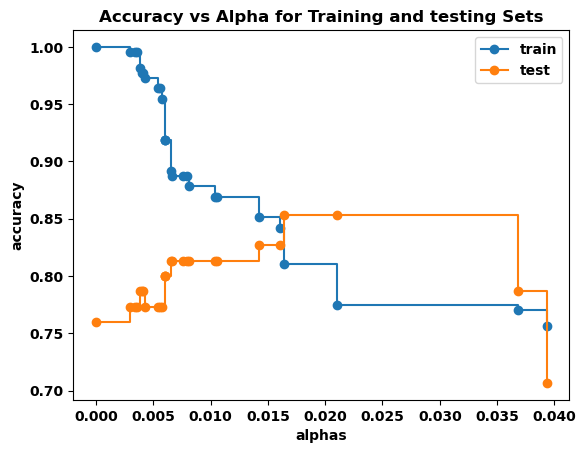

In [20]:
# Graphing the accuracy of the tree using the Training and testing dataset
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alphas')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for Training and testing Sets')
ax.plot(
    ccp_alphas, 
    train_scores, 
    marker='o', 
    label='train', 
    drawstyle="steps-post"
)

ax.plot(
    ccp_alphas, 
    test_scores, 
    marker='o', 
    label='test', 
    drawstyle="steps-post"
)

ax.legend()
plt.show()

In the graph above, we see that the accuracy for the __Testing Dataset__ hist its maximum value when `alpha` is about __0.016__. After this value for `alpha`, the ccuracy of the __Training Dataset__ drops off and that suggests we should set `ccp_alpha=0.16`

Nwxt, we levergae __10-Fold Corss Validation__ to be sure we have used the bset __Training Dataset__ after splitting our dataset into __Training__ and __Testing__ dataset

### Cost Complexity Pruning
#### <u>Cross Validation for Finding the Best Alpha</u>

The graph above suggested one value for aplha, __0.016__, but another set of data might suggest another optimal value.

First, I demonstrate that a different training and testing dataset results in trees with different accuracies when I set `ccp_alpha=0.016`. I'll accomplish this by using the `cross_val_score()` function to generate different training and testing datasets and then train and test with those datasets.

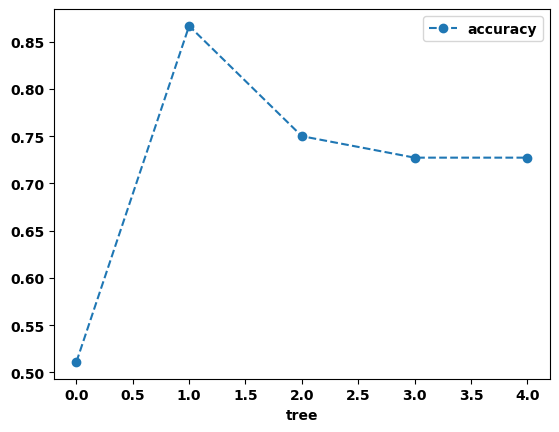

In [21]:
# Creating the tree with ccp_alpha=0.016
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# cross validation to create different training and test datasets
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--');

I use 5-Fold cross validation to create 5 different training and test datasets that are then uded to train and test the tree. I use 5-Fold because the data I'm using is not massive.

The graph above shows that using different __Training__ and __Testing__ data with the same `alpha` resulted in different accuracies, suggesting that `alpha` is sensitive to the datasets. So, instead of picking a single __Training__ dataset and a single __Testing__ dataset, I use __Cross Validation__ to find the optimal value for `ccp_alpha`

#### <u>Creating an array to store the results of each fold during cross validation</u>

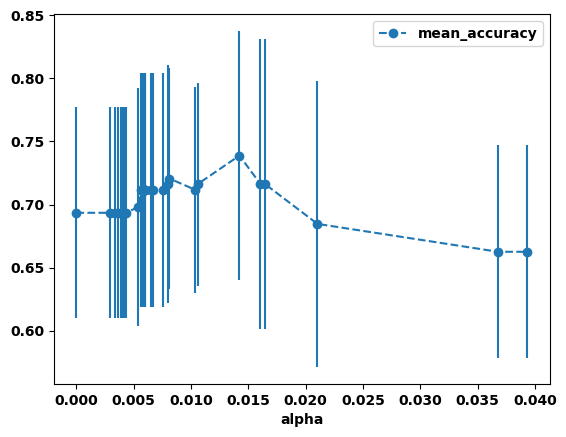

In [22]:
alpha_loop_values = []

# For each canditate value for alpha, we will run 5-Fold 
# cross validation. Then I will store the mean and standard 
# deviation of the scores (the accuracy) for each call to 
# cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Drawing a graph of the means and standard deviations of the scores
# for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean_accuracy',
    yerr='std',
    marker='o',
    linestyle='--'   
);

Using cross validation, its clear that overall, instead of setting `ccp_alpha=0.016`, I need to set it to something closer to __0.014__. I can find the exact value with:

In [23]:
alpha_results[(alpha_results['alpha'] > 0.014) 
             & 
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
21,0.014225,0.738788,0.098832


Now I store the ideal value for alpha so that i can use it to build the best tree

In [24]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                               &
                               (alpha_results['alpha'] < 0.015)]['alpha']

# Converting the values of ideal_ccp_alpha from series to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

Now that I have the ideal value for `alpha`, I can build, evaluate and drw the final Classification Tree.
<br>

## Building, Evaluating, Drawing and Interpreting the Final Classification Tree
---

In [25]:
# Building and train a new decision tree using the optimal `alpha` value
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

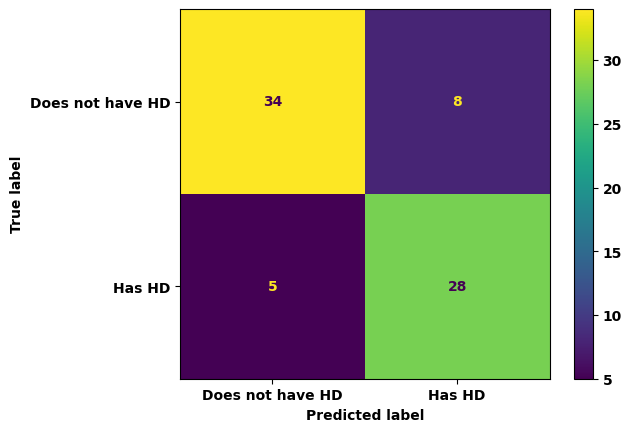

In [26]:
y_pred = clf_dt_pruned.predict(X_test)

# Drawing a new confusion matrix to see if the tree prunes better
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,
    display_labels = ["Does not have HD", "Has HD"]
);

It's clear that the pruned tree is better at classifying patients than the full sized tree

Of the __34 + * = 42__ people that did not have heart disease, __34 (81%)__ were correctly classified. This ia an improvemnt over the full sized tree, which only correctly classifed __31 (74%)__ of the patients without heart disease.

Of the __5 + 28 = 33__ people with heart disease, __28 (85%)__ were correctly classified. Again, this is an improvement over the full sized tree, which onlu classified __26 (79%)__ of the patients with heart disease.

Lastly, I draw the pruned tree and interprete it!

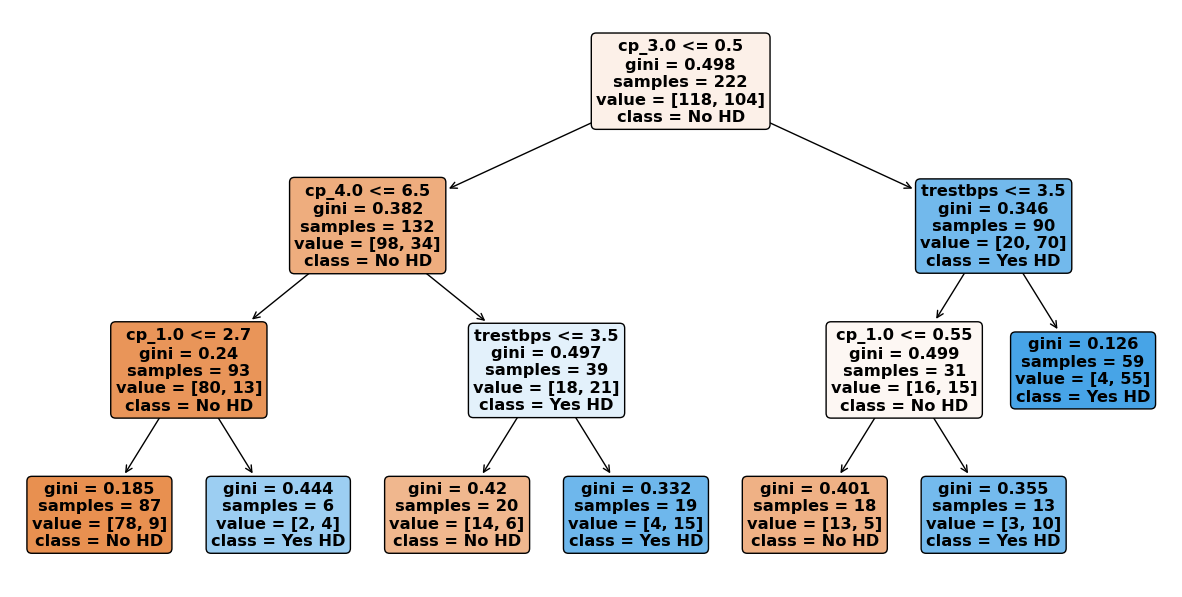

In [27]:
# Plotting the pruned classification tree
fig = plt.figure(figsize=(15, 7.5))
plot_tree(
    clf_dt_pruned,
    filled=True,
    rounded=True,
    class_names=["No HD", "Yes HD"],
    feature_names=X_encoded.columns
);

fig.savefig("Prunned_Classiification_Tree_Training.png")

## Interpretation

In each node, there exists:
- The variable (columns name) and the threshold for splitting the observations. For example, in the tree's root, we use **cp** to split the observations. All observations with <b>cp < = 0.5</b> go to the <b>left</b> and all observations with <b>cp > 0.5</b> go to the <b>right.</b>
- __gini__ is the gini index or score for that node.
- <b>samples</b> tell us how many samples are in that node.
- <b>value</b> tells us how many samples in the node are in each category. In this example, we have two categories, <b>No</b> and <b>Yes</b>, referring to whether or not a patient has heart disease. The number of patients with <b>No</b> comes first becausethe categories are in alphabetical order. Thus, in the root, 118 patients have <b>No</b> and 104 patients have <b>Yes</b>.
- <b>class</b> tells us whichever category is represented most in the node. In the root, since ii1 people have <b>No</b> and only 104 people have <b>Yes</b>, class is set to <b>No.</b>
    
The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.
    
Lastly, the nodes and leaves are colored by the <b>class</b>. In this case <b>No</b> is different shades of orange-ish and <b>Yes</b> is different shades of blue. The darker the shade, the lower the <b>gini</b> score, and that tells us how much the node or leaf is skewed towards one class.